# 데이터 전처리

### 결측치 처리

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

data = {
    "age" : [25, 27, np.nan, 30, np.nan, 35],
    "income" : [50000, 54000, 58000, np.nan, 61000, np.nan]
}

df = pd.DataFrame(data)
df

,age,income
0,25.0,50000.0
1,27.0,54000.0
2,NaN,58000.0
3,30.0,NaN
4,NaN,61000.0
5,35.0,NaN


In [2]:
# 결측치가 있는지 확인하는 함수
df.isnull().sum()

age       2
income    2
dtype: int64

### 결측치 제거

In [3]:
# 결측치가 있는 모든 행을 삭제해주는 함수.
df.dropna()

,age,income
0,25.0,50000.0
1,27.0,54000.0


#### 사이킷 `SimpleImputer` 사용

In [4]:
from sklearn.impute import SimpleImputer

print("📋 원본 데이터:\n", df)

# 2. 평균(mean)으로 결측치 대체
imputer = SimpleImputer(strategy='median') 
# median: 중앙값 (중앙값이 여러 개일 경우, 두 중앙값의 평균 값으로 처리)
# most_frequent: 최빈값(최빈이 여러 개일 경우 가장 작은 값으로 처리)
# constant: 고정값 (= df.fillna)
result = imputer.fit_transform(df[['age', 'income']]) # fit 은 학습하라는 의미, transform 은 적용하라는 의미
df[['age', 'income']] = result
print("\n✅ 결측치 처리 후:\n", df)

📋 원본 데이터:
     age   income
0  25.0  50000.0
1  27.0  54000.0
2   NaN  58000.0
3  30.0      NaN
4   NaN  61000.0
5  35.0      NaN

✅ 결측치 처리 후:
     age   income
0  25.0  50000.0
1  27.0  54000.0
2  28.5  58000.0
3  30.0  56000.0
4  28.5  61000.0
5  35.0  56000.0


## 이상치 처리

In [5]:
import pandas as pd
import numpy as np

# 사이킷런에 데이터셋에서 켈리포니아 하우징이라는 데이터를 불러온 것 입니다.
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [6]:
# 사이킷런 데이터셋 켈리포니아 데이터를 데이터프레임으로 만들어주는 과정.
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
# feature_names에는 target이라는 정답 데이터가 들어있지 않기 때문에 추가해서 넣어 주었다.
df["target"] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- 데이터 타입 확인

In [8]:
# 결측치는 없고 모든 데이터 타입은 float라는 것을 확인할 수 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- 통계 데이터 확인

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


- 결측치 데이터 확인

In [10]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 박스 플롯을 만들어줘서 데이터의 분포와 이상치를 시각적으로 보여주는 그래프.
# draw_boxplot라는 함수를 만들어줘서 시각화를 할 때 코드를 길게 적지 않게 해줬다.
def draw_boxplot(df, columns):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df[columns])
    plt.show()

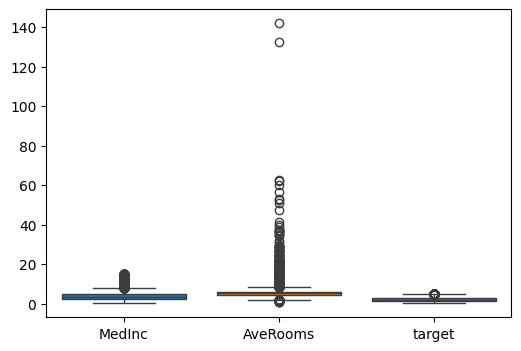

In [12]:
# 3가지의 컬럼을 확인해서 데이터의 분포와 이상치를 확인해본 결과 AveRooms에 이상치가 발견 됐다.
draw_boxplot(df, ["MedInc", "AveRooms", "target"])

In [13]:
def remove_iqr(df, columns):
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
        # df_clean = df_clean[~((df_clean['col'] < lower) | (df_clean['col'] > upper))]
    
    return df_clean

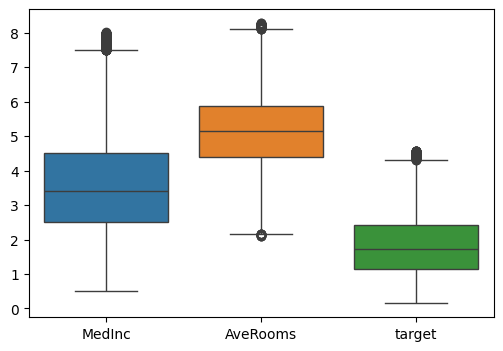

(18818, 9)

In [14]:
new_df = remove_iqr(df, ["MedInc", "AveRooms", "target"])
draw_boxplot(new_df, ['MedInc', 'AveRooms', 'target'])
new_df.shape

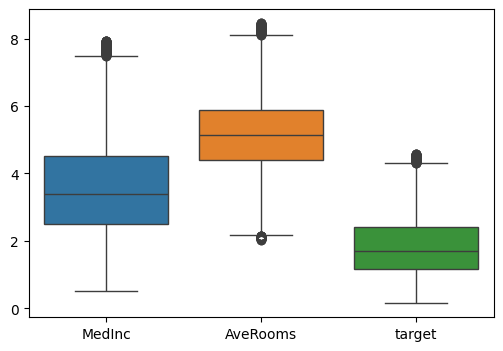

(18846, 9)

In [15]:
new_df_1 = remove_iqr(df, ["AveRooms", "MedInc", "target"])
draw_boxplot(new_df_1, ['MedInc', 'AveRooms', 'target'])
new_df_1.shape

In [ ]:
def remove_iqr_same(df, columns):
    df_clean = df.copy()

    ranges = []
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        

SyntaxError: expected '(' (1544846197.py, line 1)